In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import array as arr

In [3]:
df = pd.read_excel('allegations_202007271729.xlsx')
display(df)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,4905,Johnny,Orellana,045 PCT,0,26559,9,2012,2,2014,...,42,Black,Female,34.0,Offensive Language,Gender,44.0,PD suspected C/V of violation/crime - street,Arrest - disorderly conduct,Substantiated (Charges)
1,6101,Emilio,Melendez,050 PCT,0,40067,8,2018,7,2019,...,51,NaN,Male,27.0,Discourtesy,Action,46.0,C/V intervened on behalf of/observed encounter...,Summons - disorderly conduct,Substantiated (Command Discipline B)
2,6196,Thomas,Alps,052 PCT,0,35131,5,2016,11,2016,...,44,NaN,NaN,NaN,Abuse of Authority,Premises entered and/or searched,52.0,Report of other crime,No arrest made or summons issued,Substantiated (Formalized Training)
3,6943,Anthony,Longobardi,062 PCT,0,33446,9,2015,1,2016,...,38,Black,Male,45.0,Abuse of Authority,Other,67.0,Report-noise/disturbance,Arrest - OGA,Substantiated (Command Discipline B)
4,6943,Anthony,Longobardi,062 PCT,0,33446,9,2015,1,2016,...,38,NaN,NaN,NaN,Abuse of Authority,Premises entered and/or searched,67.0,Report-noise/disturbance,Arrest - OGA,Substantiated (Command Discipline B)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,36374,Ronald,Perez,YTH SD,0,20017,3,2010,7,2011,...,41,Hispanic,Male,42.0,Abuse of Authority,Vehicle search,72.0,PD suspected C/V of violation/crime - auto,Moving violation summons issued,Substantiated (Charges)
33354,36374,Ronald,Perez,YTH SD,0,20017,3,2010,7,2011,...,41,Hispanic,Male,42.0,Abuse of Authority,Vehicle stop,72.0,PD suspected C/V of violation/crime - auto,Moving violation summons issued,Substantiated (Charges)
33355,36374,Ronald,Perez,YTH SD,0,20017,3,2010,7,2011,...,41,NaN,NaN,NaN,Abuse of Authority,Gun Drawn,72.0,PD suspected C/V of violation/crime - auto,Moving violation summons issued,Substantiated (Charges)
33356,36374,Ronald,Perez,YTH SD,0,20017,3,2010,7,2011,...,41,NaN,NaN,NaN,Abuse of Authority,Retaliatory summons,72.0,PD suspected C/V of violation/crime - auto,Moving violation summons issued,Substantiated (Charges)


In [4]:
df1 = df[df["year_received"]>=2000]
df1 

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,4905,Johnny,Orellana,045 PCT,0,26559,9,2012,2,2014,...,42,Black,Female,34.0,Offensive Language,Gender,44.0,PD suspected C/V of violation/crime - street,Arrest - disorderly conduct,Substantiated (Charges)
1,6101,Emilio,Melendez,050 PCT,0,40067,8,2018,7,2019,...,51,NaN,Male,27.0,Discourtesy,Action,46.0,C/V intervened on behalf of/observed encounter...,Summons - disorderly conduct,Substantiated (Command Discipline B)
2,6196,Thomas,Alps,052 PCT,0,35131,5,2016,11,2016,...,44,NaN,NaN,NaN,Abuse of Authority,Premises entered and/or searched,52.0,Report of other crime,No arrest made or summons issued,Substantiated (Formalized Training)
3,6943,Anthony,Longobardi,062 PCT,0,33446,9,2015,1,2016,...,38,Black,Male,45.0,Abuse of Authority,Other,67.0,Report-noise/disturbance,Arrest - OGA,Substantiated (Command Discipline B)
4,6943,Anthony,Longobardi,062 PCT,0,33446,9,2015,1,2016,...,38,NaN,NaN,NaN,Abuse of Authority,Premises entered and/or searched,67.0,Report-noise/disturbance,Arrest - OGA,Substantiated (Command Discipline B)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,36374,Ronald,Perez,YTH SD,0,20017,3,2010,7,2011,...,41,Hispanic,Male,42.0,Abuse of Authority,Vehicle search,72.0,PD suspected C/V of violation/crime - auto,Moving violation summons issued,Substantiated (Charges)
33354,36374,Ronald,Perez,YTH SD,0,20017,3,2010,7,2011,...,41,Hispanic,Male,42.0,Abuse of Authority,Vehicle stop,72.0,PD suspected C/V of violation/crime - auto,Moving violation summons issued,Substantiated (Charges)
33355,36374,Ronald,Perez,YTH SD,0,20017,3,2010,7,2011,...,41,NaN,NaN,NaN,Abuse of Authority,Gun Drawn,72.0,PD suspected C/V of violation/crime - auto,Moving violation summons issued,Substantiated (Charges)
33356,36374,Ronald,Perez,YTH SD,0,20017,3,2010,7,2011,...,41,NaN,NaN,NaN,Abuse of Authority,Retaliatory summons,72.0,PD suspected C/V of violation/crime - auto,Moving violation summons issued,Substantiated (Charges)


In [17]:
l = []
for i in range(19):
    dfx = df1[df1['year_received'] == 2000+i]
    a = dfx.groupby('board_disposition').count()['complaint_id']
    l.append(a)

print(l[3],"2003")

board_disposition
Exonerated                            286
Substantiated (Charges)               198
Substantiated (Command Discipline)     18
Substantiated (Instructions)            2
Unsubstantiated                       288
Name: complaint_id, dtype: int64 2003


In [18]:
list = []
for i in range(19):
    a = 0
    for k in range(33358):
        if df['year_received'][k]==2000+i and df['board_disposition'][k]=='Unsubstantiated':
            a = a + 1
    list.append(a)
list

[78,
 116,
 175,
 288,
 315,
 464,
 660,
 925,
 802,
 915,
 833,
 1012,
 1030,
 1148,
 1203,
 976,
 1008,
 1046,
 917]

In [19]:
list1 = []
for i in range(19):
    a = 0
    for k in range(33358):
        if df['year_received'][k]==2000+i:
            a = a + 1
    list1.append(a)
list1

[232,
 344,
 571,
 792,
 972,
 1345,
 1654,
 1892,
 1631,
 1761,
 1659,
 1896,
 1841,
 2114,
 2220,
 2312,
 2345,
 2178,
 2281]

In [20]:
list2 = []
for i in range(19):
    a = 0
    for k in range(33358):
        if df['year_received'][k]==2000+i and df['board_disposition'][k]!='Unsubstantiated' and df['board_disposition'][k] != 'Exonerated':
            a = a + 1
    list2.append(a)
list2

[69,
 76,
 156,
 218,
 261,
 280,
 323,
 268,
 255,
 328,
 290,
 438,
 465,
 546,
 618,
 812,
 748,
 551,
 647]

In [21]:
list3 = []
for i in range(19):
    a = 0
    for k in range(33358):
        if df['year_received'][k]==2000+i and df['board_disposition'][k] == 'Exonerated':
            a = a + 1
    list3.append(a)
list3

[85,
 152,
 240,
 286,
 396,
 601,
 671,
 699,
 574,
 518,
 536,
 446,
 346,
 420,
 399,
 524,
 589,
 581,
 717]

In [23]:
list4 = []
for i in range(19):
    a = list[i] + list2[i] + list3[i]
    list4.append(a)
print(list4)
print(list2)

[232, 344, 571, 792, 972, 1345, 1654, 1892, 1631, 1761, 1659, 1896, 1841, 2114, 2220, 2312, 2345, 2178, 2281]
[69, 76, 156, 218, 261, 280, 323, 268, 255, 328, 290, 438, 465, 546, 618, 812, 748, 551, 647]


[232, 344, 571, 792, 972, 1345, 1654, 1892, 1631, 1761, 1659, 1896, 1841, 2114, 2220, 2312, 2345, 2178, 2281, 1642]
[69, 76, 156, 218, 261, 280, 323, 268, 255, 328, 290, 438, 465, 546, 618, 812, 748, 551, 647, 507]


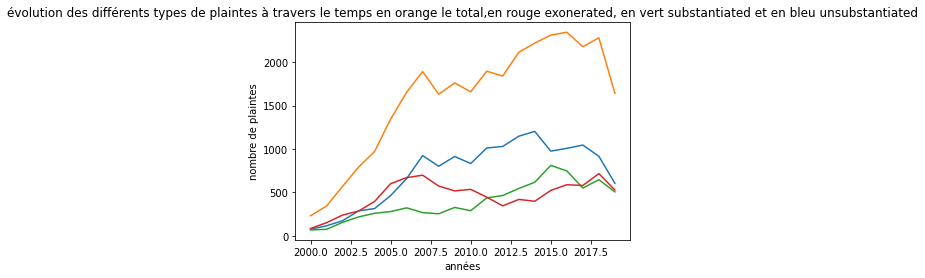

In [11]:
x = list
z = list1
v = list2 
w = list3
y = [2000+i for i in range(20)]
plt.plot(y,x, label = "")
plt.plot(y,z)
plt.plot(y,v)
plt.plot(y,w)
plt.title("évolution des différents types de plaintes à travers le temps en orange le total,en rouge exonerated, en vert substantiated et en bleu unsubstantiated")
plt.xlabel("années")
plt.ylabel("nombre de plaintes")
plt.show

print(list1)
print(list2)

<function matplotlib.pyplot.show(close=None, block=None)>

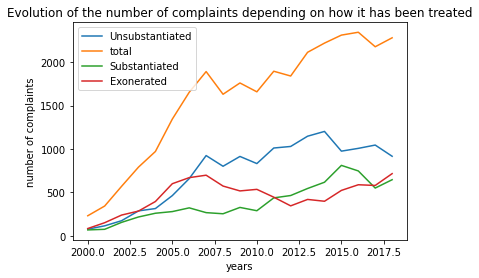

In [24]:
x = list
z = list1
v = list2 
w = list3
y = [2000+i for i in range(19)]
plt.plot(y,x, label = "Unsubstantiated")
plt.plot(y,z, label = "total")
plt.plot(y,v, label = "Substantiated")
plt.plot(y,w, label = "Exonerated")
plt.title("Evolution of the number of complaints depending on how it has been treated")
plt.xlabel("years")
plt.ylabel("number of complaints")
plt.legend()
plt.show

In [14]:
#à ne pas regarder je le garde au cas où
h = []
for t in range(2,14):
    g = set()
    for k in range(33358-t):
        if df['year_received'][k] >= 2000:
            ct = 0
            for i in range(1,t+1):
                if df['unique_mos_id'][k] == df['unique_mos_id'][k+i] and df['complaint_id'][k] == df['complaint_id'][k+i]:
                    ct  = ct + 1
            if ct == t:
                g.add(df['unique_mos_id'][k])
    h.append("il ya " + str(len(g)) + " cas ou il y a " + str(t) + " plaintes pour le même incident")

h

KeyboardInterrupt: 

In [15]:
df2 = df.sort_values("complaint_id")
df1 = df2.reset_index()
display(df1)


,index,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,15222,17403,Edward,Mullane,CD OP/D,0,517,9,1985,9,...,25,NaN,NaN,NaN,Force,Push/Shove,83.0,Report of Crime Past/Present,No arrest made or summons issued,Unsubstantiated
1,15221,17403,Edward,Mullane,CD OP/D,0,517,9,1985,9,...,25,NaN,NaN,NaN,Discourtesy,Curse,83.0,Report of Crime Past/Present,No arrest made or summons issued,Unsubstantiated
2,15223,17403,Edward,Mullane,CD OP/D,0,517,9,1985,9,...,25,NaN,NaN,NaN,Abuse of Authority,Arrest/D. A. T.,83.0,Report of Crime Past/Present,No arrest made or summons issued,Unsubstantiated
3,18259,20619,Troy,Patterson,FAM SEC,2609,525,10,1985,10,...,23,NaN,NaN,NaN,Abuse of Authority,Arrest/Onlooker,71.0,Report of Crime Past/Present,No arrest made or summons issued,Unsubstantiated
4,18258,20619,Troy,Patterson,FAM SEC,2609,525,10,1985,10,...,23,NaN,NaN,NaN,Force,Dragged/Pulled,71.0,Report of Crime Past/Present,No arrest made or summons issued,Unsubstantiated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,27514,2082,Timothy,Sprague,024 PCT,5620,43673,12,2019,6,...,32,Black,Female,42.0,Abuse of Authority,Threat of arrest,24.0,Report of other crime,Arrest - other violation/crime,Exonerated
33354,20844,23011,Robert,Obrien,INT CIS,18045,43683,1,2020,5,...,35,NaN,NaN,NaN,Abuse of Authority,Entry of Premises,79.0,Execution of search warrant,No arrest made or summons issued,Exonerated
33355,20845,23011,Robert,Obrien,INT CIS,18045,43683,1,2020,5,...,35,Black,Female,56.0,Abuse of Authority,Property damaged,79.0,Execution of search warrant,No arrest made or summons issued,Exonerated
33356,20846,23011,Robert,Obrien,INT CIS,18045,43683,1,2020,5,...,35,NaN,NaN,NaN,Abuse of Authority,Search of Premises,79.0,Execution of search warrant,No arrest made or summons issued,Exonerated


In [16]:
z = []
for t in range(1,30):
    g = set()
    for k in range(33358-(t+1)):
        if df1['year_received'][k] >= 2000:
            ct = 0
            for i in range(1,t+1):
                if df1['complaint_id'][k] == df1['complaint_id'][k+i]:
                    ct  = ct + 1
            if ct == t:
                g.add(df1['complaint_id'][k])
    z.append(len(g))


z

[7415,
 4681,
 2957,
 1858,
 1165,
 750,
 493,
 322,
 213,
 151,
 106,
 78,
 55,
 37,
 28,
 22,
 14,
 10,
 6,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [17]:
z2 = [0 for i in range(1,31)]
z1 = [0 for i in range(1,31)]

z3 = [i for i in range(1,31)]
print(z1,z2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
#vrai code

for i in range(28):
    z2[i] = z[i] - z[i+1]

for i in range(29):
    z1[i] = "il ya " + str(z2[i]) + " cas ou il y a " + str(i+1) + " plaintes pour le même incident"
    
z2[29] = 1
z2

[2734,
 1724,
 1099,
 693,
 415,
 257,
 171,
 109,
 62,
 45,
 28,
 23,
 18,
 9,
 6,
 8,
 4,
 4,
 4,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [19]:
list = zip(z3,z2)
df87 = pd.DataFrame(list, columns = ['number of complaints cumulated','nomber of complaint_id associated whith this number of complaints'])
display(df87)
df87.to_excel('dataA.xlsx', index = False)

,number of complaints cumulated,nomber of complaint_id associated whith this number of complaints
0,1,2734
1,2,1724
2,3,1099
3,4,693
4,5,415
5,6,257
6,7,171
7,8,109
8,9,62
9,10,45


In [24]:
df1 = df[df['year_received']>= 2000]
df6 = df1.complaint_id.value_counts()


display(df6)

df7 = pd.DataFrame(df6)
df7 = df7.reset_index()
df7 = df7.rename(columns = {'index' : 'complaint_id','complaint_id' : 'number of different complaints'})
display(df7)



36901    30
38927    23
31072    20
41986    20
42640    20
         ..
17173     1
18049     1
20604     1
22748     1
10725     1
Name: complaint_id, Length: 11312, dtype: int64

,complaint_id,number of different complaints
0,36901,30
1,38927,23
2,31072,20
3,41986,20
4,42640,20
...,...,...
11307,17173,1
11308,18049,1
11309,20604,1
11310,22748,1


In [25]:
df7.groupby('number of different complaints').count()['complaint_id']

number of different complaints
1     3897
2     2734
3     1724
4     1099
5      693
6      415
7      257
8      171
9      109
10      62
11      45
12      28
13      23
14      18
15       9
16       6
17       8
18       4
19       4
20       4
23       1
30       1
Name: complaint_id, dtype: int64